In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from pandas.plotting import register_matplotlib_converters
plt.rcParams['figure.figsize'] = [22, 10]
register_matplotlib_converters()


from src.ireland_c19_data import get_daily_c19_ireland_data, get_gov_c19_ireland_dataset
from src.c19_plotting import C19Plot

df = get_daily_c19_ireland_data()
df_hspc = get_gov_c19_ireland_dataset()

c19plot = C19Plot(df, df_hspc)
df

,date,c19_icu_cases,available_icu_beds,c19_ventilated_cases,c19_icu_cases_rm,c19_ventilated_cases_rm,available_icu_beds_rm
32,2020-05-15,56,155,40,59.000000,42.333333,145.000000
33,2020-05-16,54,151,38,56.333333,40.666667,145.666667
34,2020-05-17,51,138,34,53.666667,37.333333,148.000000
35,2020-05-18,55,141,39,53.333333,37.000000,143.333333
36,2020-05-19,54,132,38,53.333333,37.000000,137.000000
37,2020-05-20,49,126,35,52.666667,37.333333,133.000000
38,2020-05-21,52,109,36,51.666667,36.333333,122.333333
39,2020-05-22,49,107,34,50.000000,35.000000,114.000000
40,2020-05-23,51,114,35,50.666667,35.000000,110.000000
41,2020-05-24,49,126,33,49.666667,34.000000,115.666667


In [74]:
df_hspc.tail()

,X,Y,Date,ConfirmedCovidCases,TotalConfirmedCovidCases,ConfirmedCovidDeaths,TotalCovidDeaths,ConfirmedCovidRecovered,TotalCovidRecovered,StatisticsProfileDate,...,RequiringICUCovidCases_new,RequiringICUCovidCases_new_rm,HospitalisedAged5_new_rm,HospitalisedAged5to14_new_rm,HospitalisedAged15to24_new_rm,HospitalisedAged25to34_new_rm,HospitalisedAged35to44_new_rm,HospitalisedAged45to54_new_rm,HospitalisedAged55to64_new_rm,HospitalisedAged65up_new_rm
109,-856335.869598,7.036492e+06,2020-06-19 00:00:00+00:00,13,25368,2,1714,21929,21929,2020/06/17 00:00:00+00,...,0.0,0.0,0.333333,0.0,0.333333,0.333333,0.333333,0.333333,0.333333,1.666667
110,-856335.869598,7.036492e+06,2020-06-20 00:00:00+00:00,22,25374,2,1715,21929,21929,2020/06/18 00:00:00+00,...,3.0,1.0,0.000000,0.0,0.000000,0.333333,0.333333,0.333333,0.333333,1.666667
111,-856335.869598,7.036492e+06,2020-06-21 00:00:00+00:00,6,25379,0,1715,21929,21929,2020/06/19 00:00:00+00,...,0.0,1.0,0.000000,0.0,0.000000,0.333333,0.333333,0.333333,0.333333,1.000000
112,-856335.869598,7.036492e+06,2020-06-22 00:00:00+00:00,4,25383,2,1717,21929,21929,2020/06/20 00:00:00+00,...,12.0,5.0,0.000000,0.0,0.000000,0.000000,0.666667,0.333333,0.333333,0.333333
113,-856335.869598,7.036492e+06,2020-06-23 00:00:00+00:00,10,25391,3,1720,21929,21929,2020/06/21 00:00:00+00,...,3.0,5.0,0.000000,0.0,0.000000,0.000000,0.333333,0.333333,0.333333,0.666667


In [75]:
# don't need this anymore
#c19plot.daily_death_vs_icu()

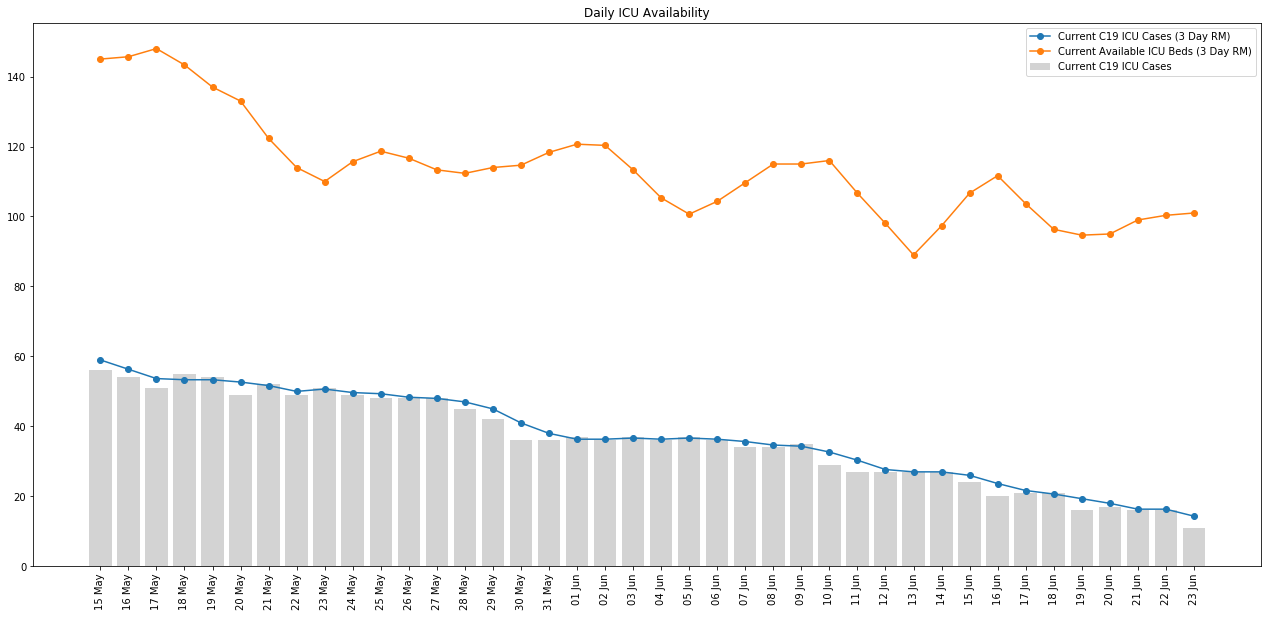

In [76]:
c19plot.daily_icu_availability()

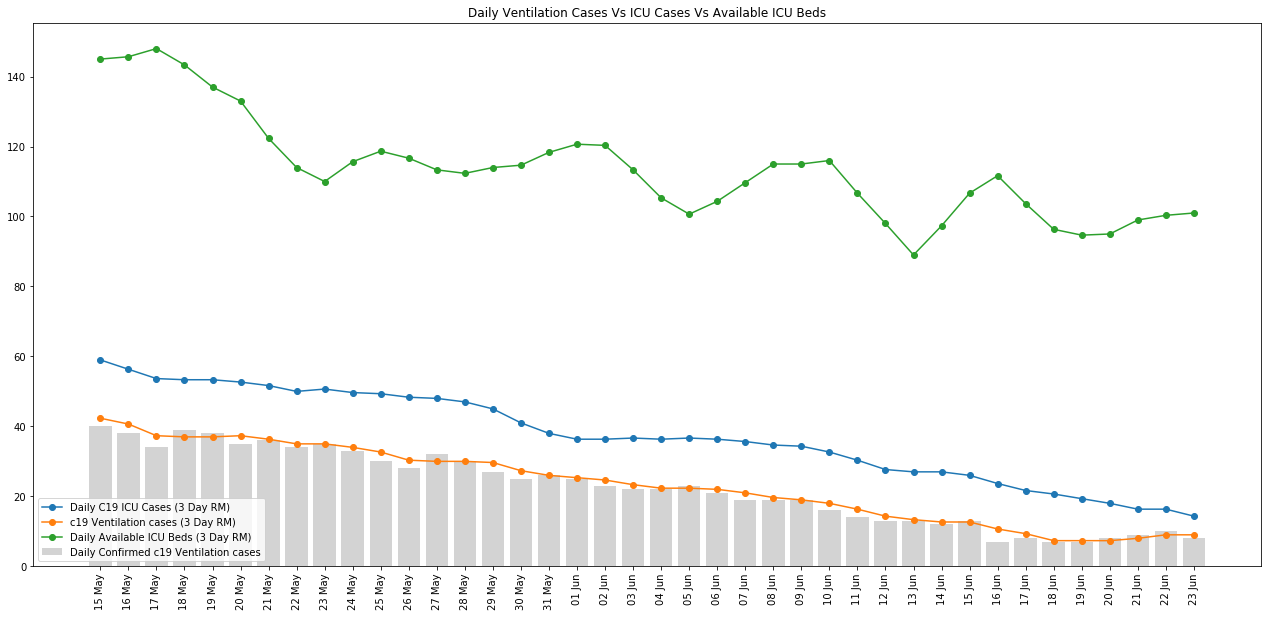

In [77]:
c19plot.daily_icu_vs_ventilation()

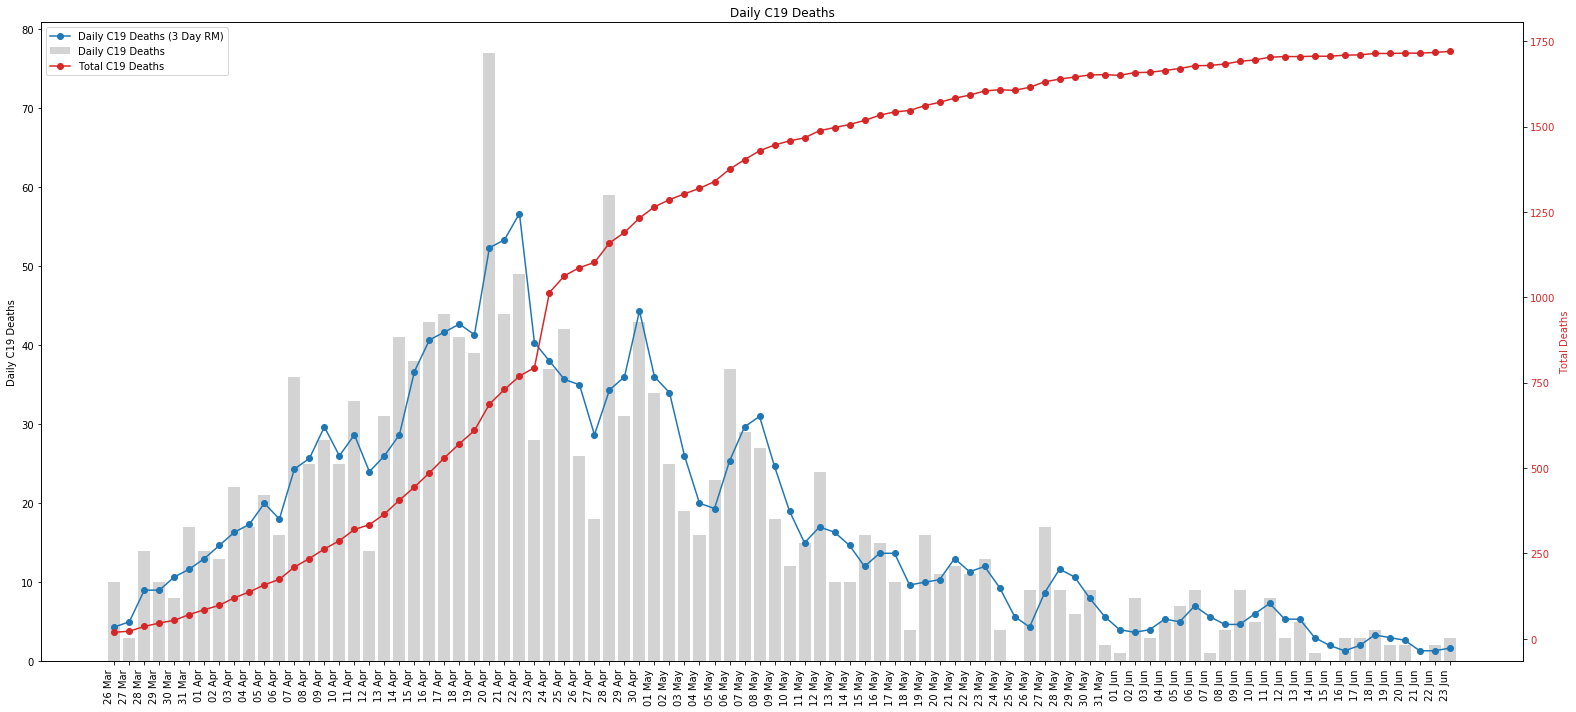

In [78]:
c19plot.hspc_daily_deaths()

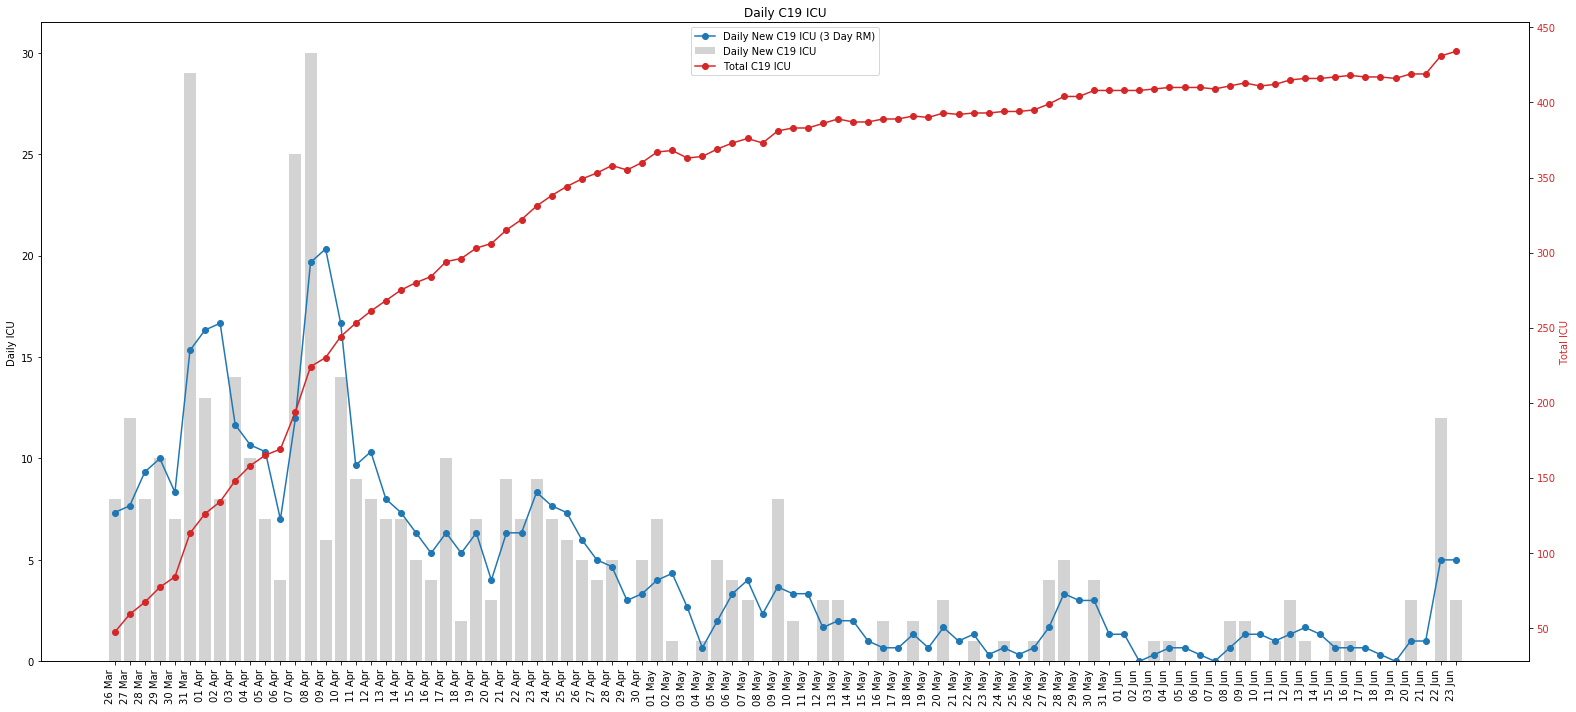

In [79]:
c19plot.hspc_icu()

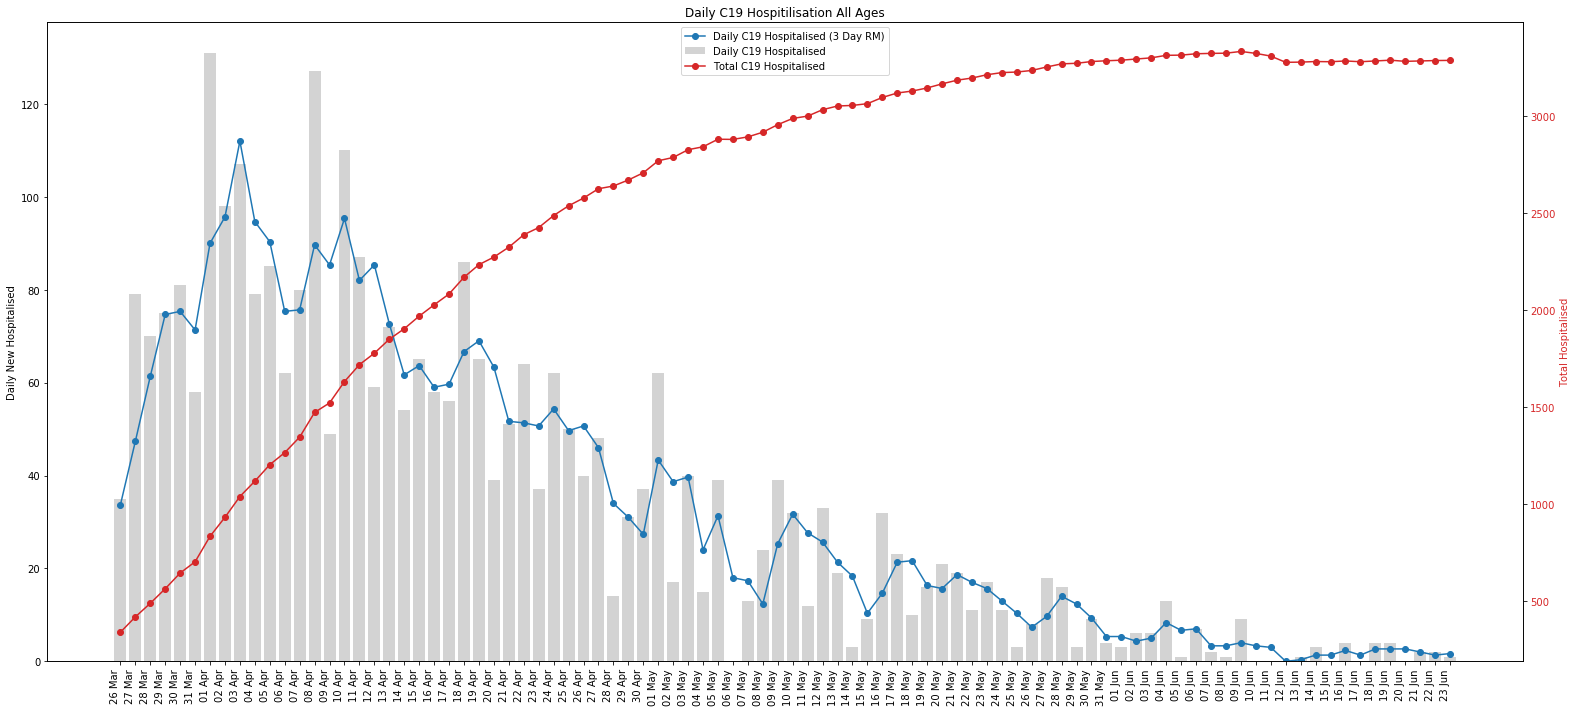

In [80]:
c19plot.hspc_hospitilisation()

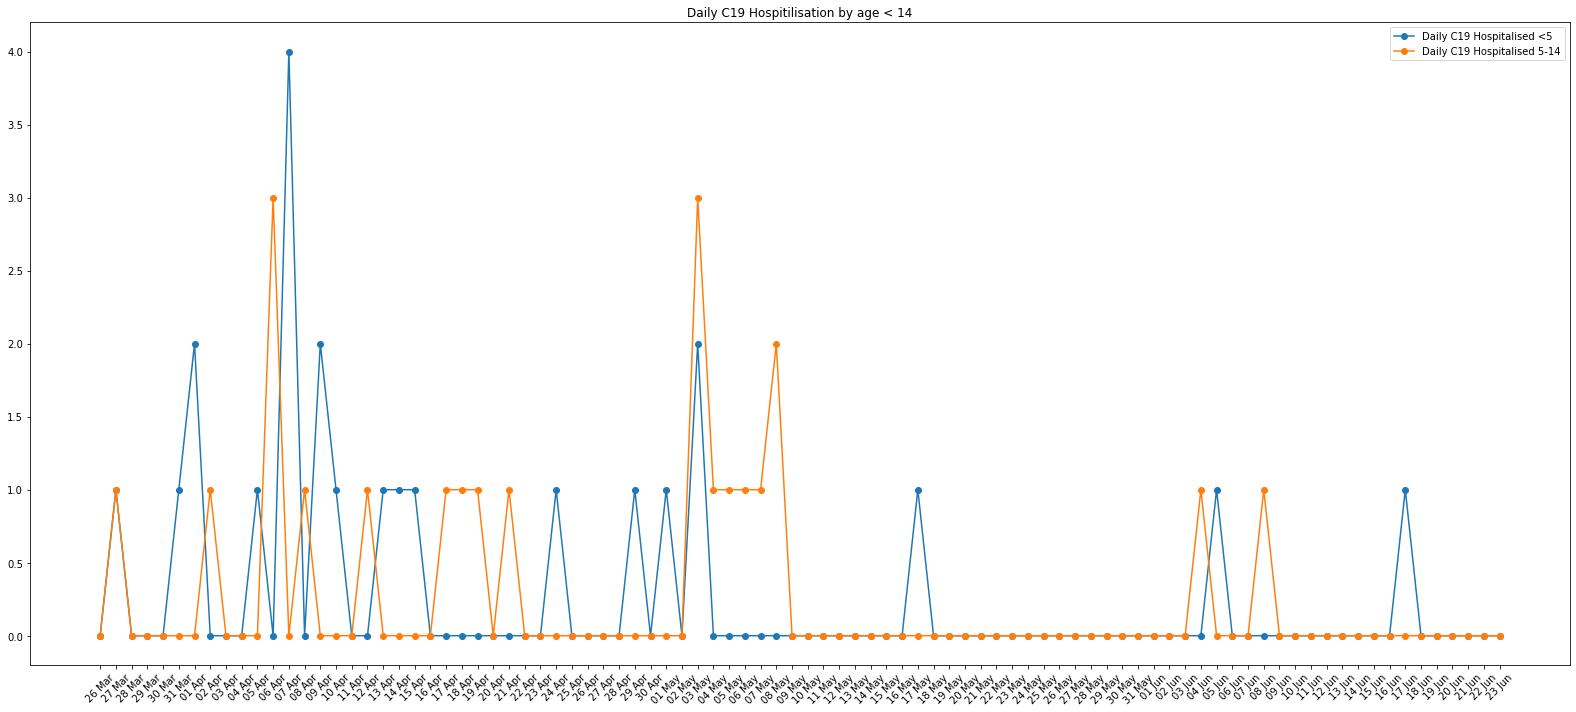

In [81]:
c19plot.hspc_hospitilisation_less_14()

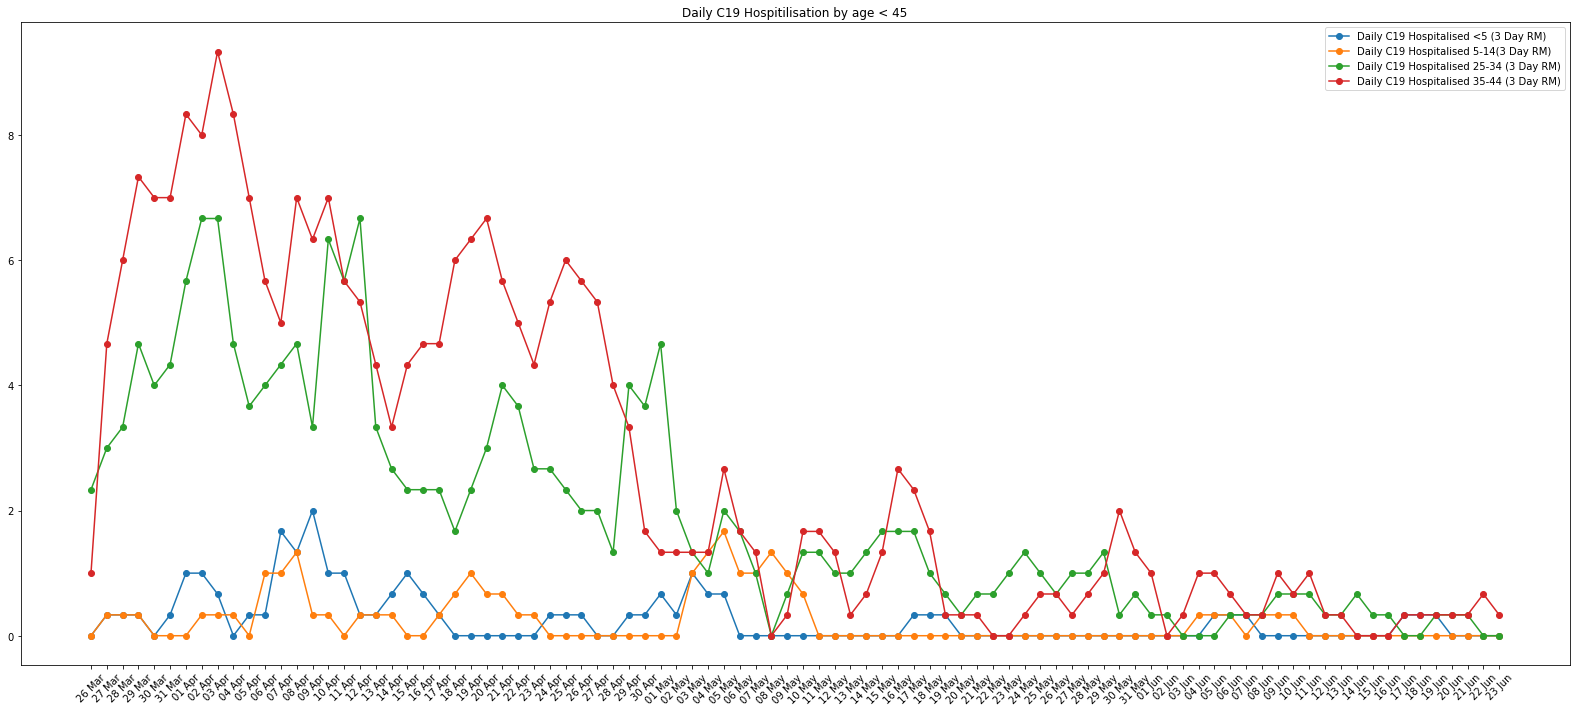

In [82]:
c19plot.hspc_hospitilisation_less_45()

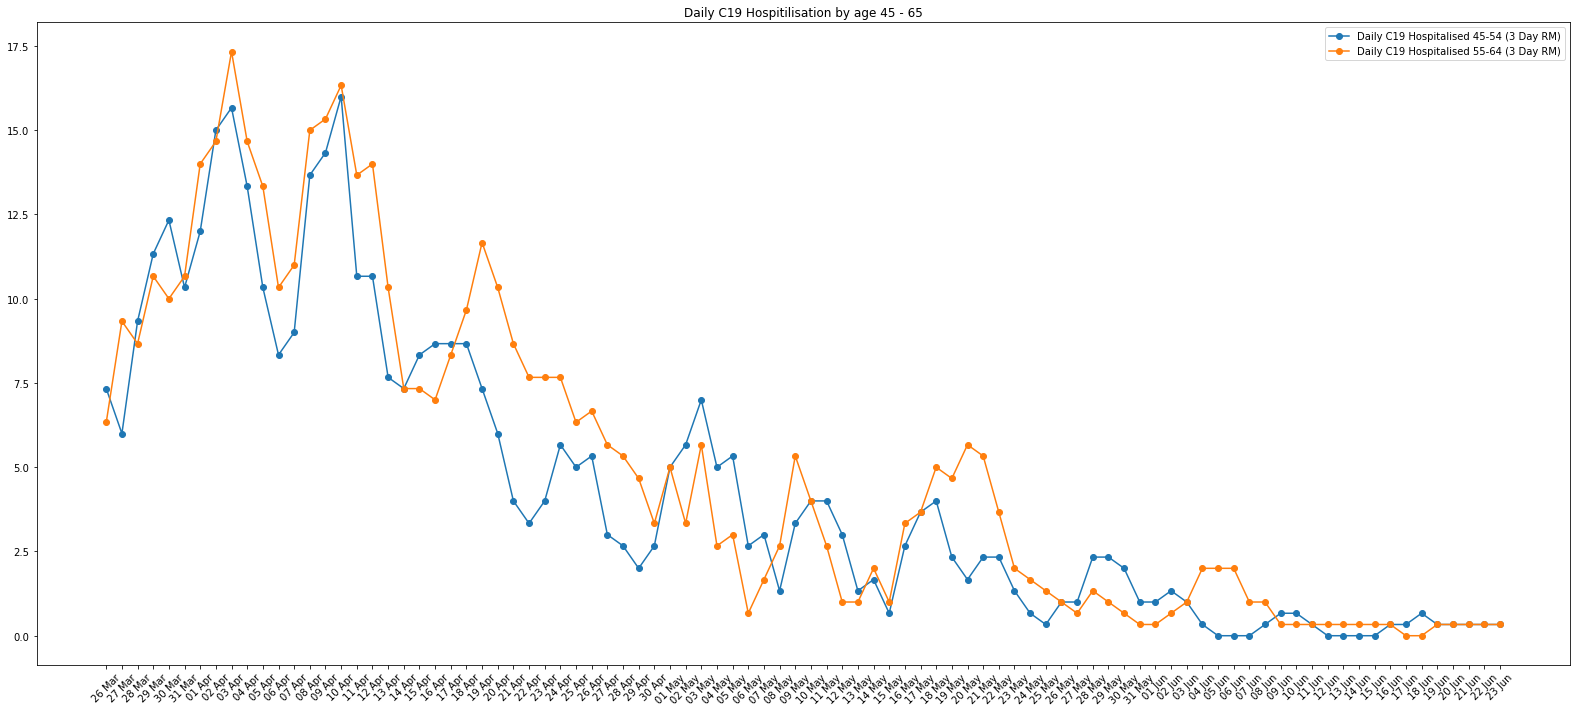

In [83]:
c19plot.hspc_hospitilisation_45_to_65()

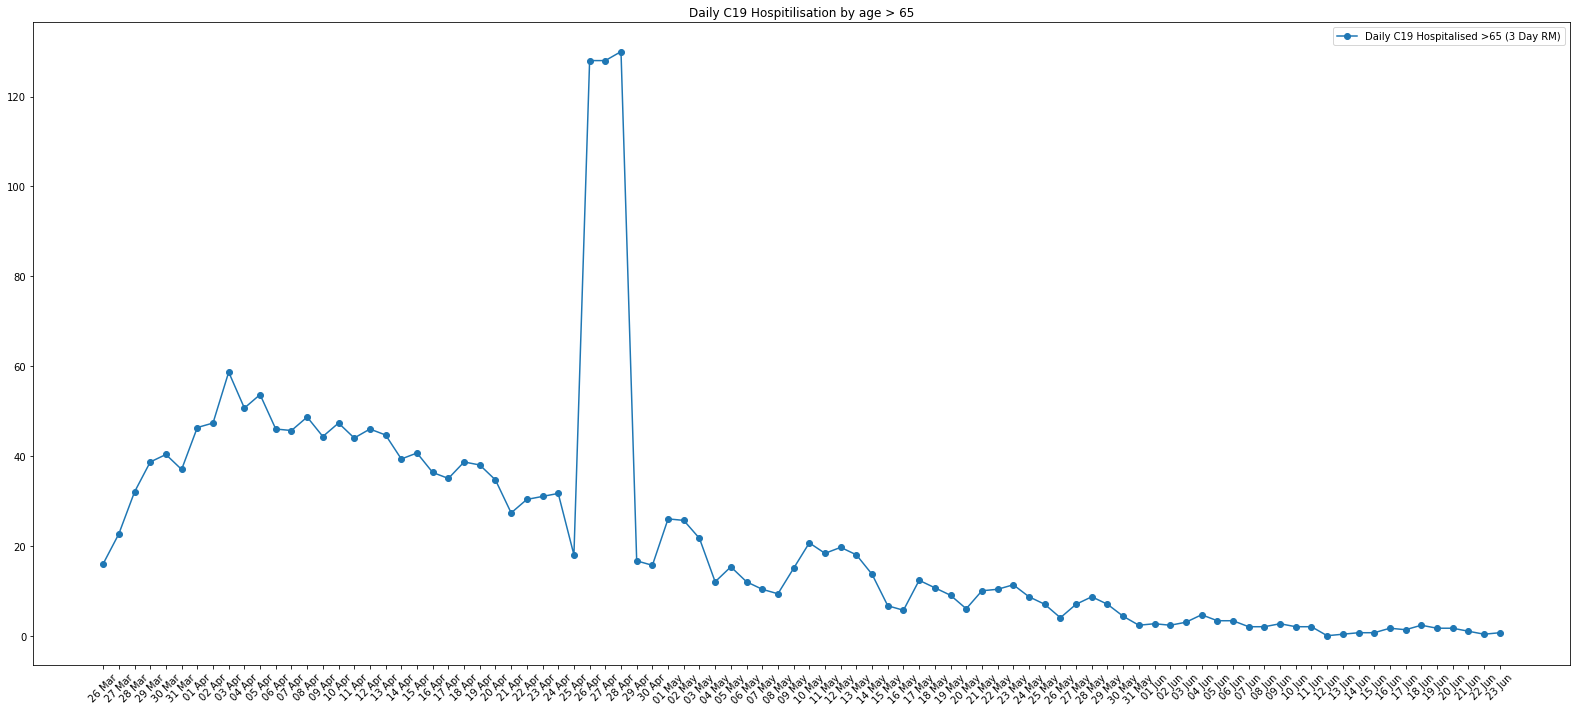

In [84]:
c19plot.hspc_hospitilisation_greater_65()